In [40]:
import numpy as np
import os
import matplotlib.pyplot as plt

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

# Упражнение 5.1

Блокнот Jupyter этой главы, chap05.ipynb, содержит приложение, в котором можно вычислить автокорреляции для различных lag. Оцените высоты тона вокального чирпа для нескольких времен начала сегмента.

In [41]:
def serial_corr (wave, lag=1):
    N = len (wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:N-lag]
    corr = np.corrcoef(y1, y2)[0, 1]
    return corr

def autocorr (wave):
    lags = range(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

In [42]:
from thinkdsp import read_wave

if not os.path.exists('28042__bcjordan__voicedownbew.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/28042__bcjordan__voicedownbew.wav

wave = read_wave('28042__bcjordan__voicedownbew.wav')
wave.normalize()
wave.make_audio()

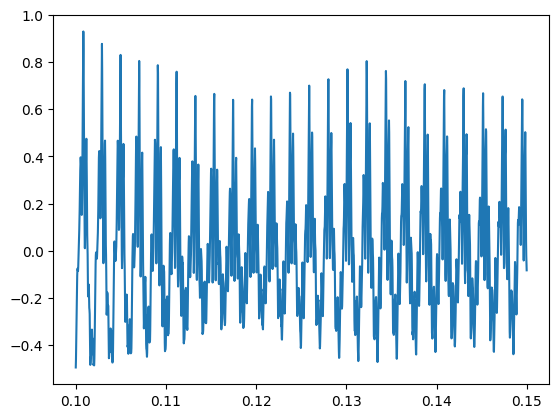

In [43]:
segment = wave.segment(start=0.1, duration=0.05)
segment.plot()

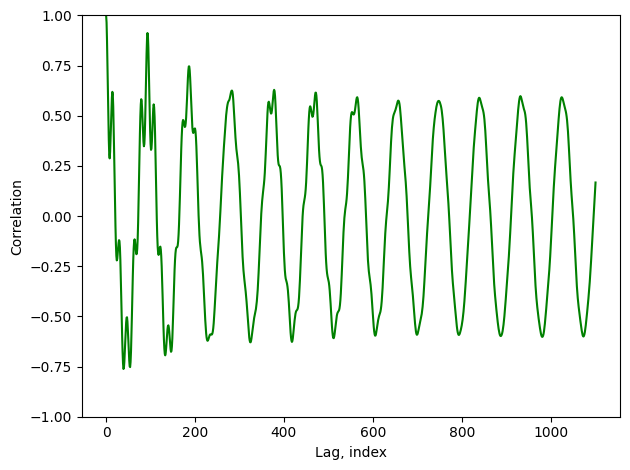

In [44]:
from thinkdsp import decorate

lags, corrs = autocorr(segment)
plt.plot(lags, corrs, color='green')
decorate(xlabel='Lag, index', ylabel='Correlation', ylim=[-1, 1])

In [45]:
low, high = 50, 200
lag = np.array(corrs[low:high]).argmax() + low
print("lag = ",lag)

lag =  93


In [46]:
period = lag / segment.framerate
frequency = 1 / period
print("freq = ", frequency)

freq =  474.1935483870968


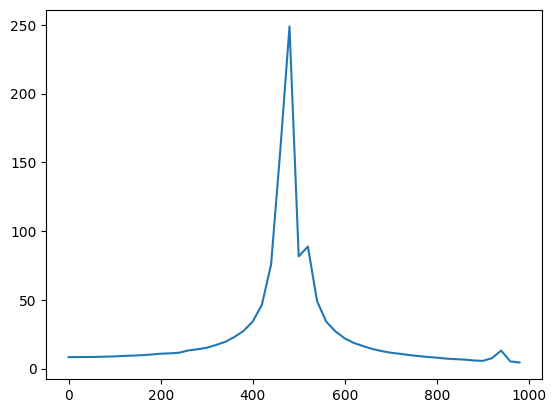

In [47]:
spectrum = segment.make_spectrum().plot(high = 1000)

Вычисленная высота соответствует графику спектра.

Оценим частоту на другом участке.

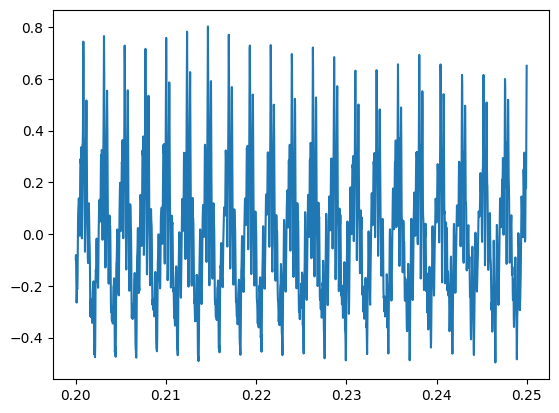

In [48]:
segment = wave.segment(start=0.2, duration=0.05)
segment.plot()

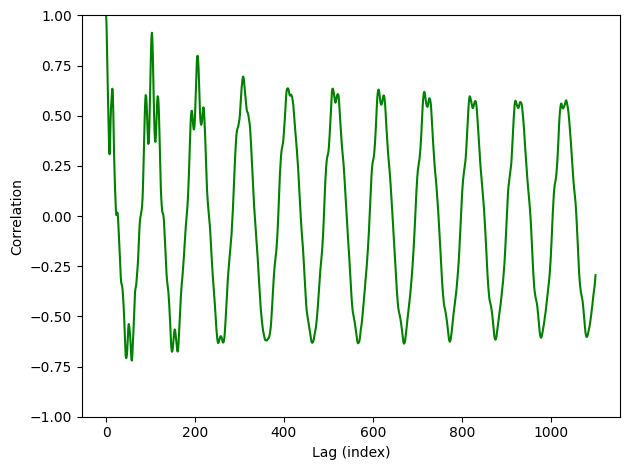

In [49]:
lags, corrs = autocorr(segment)
plt.plot(lags, corrs, color='green')
decorate(xlabel='Lag (index)', ylabel='Correlation', ylim=[-1, 1])

In [50]:
low, high = 50, 200
lag = np.array(corrs[low:high]).argmax() + low
print("lag = ",lag)

lag =  103


In [51]:
period = lag / segment.framerate
frequency = 1 / period
print("freq = ", frequency)

freq =  428.15533980582524


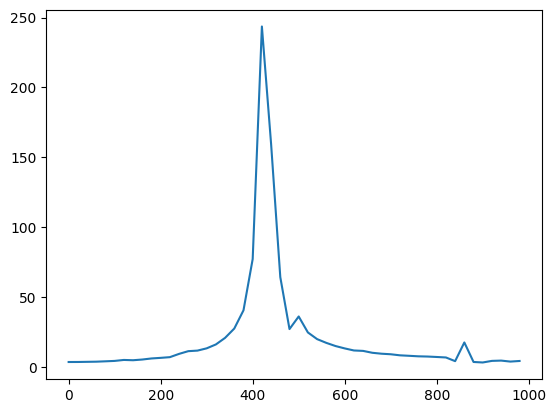

In [52]:
spectrum = segment.make_spectrum().plot(high = 1000)

Аналогично: вычисленная высота соответствует графику спектра.

# Упражнение 5.2

Пример кода в chap05.ipynb показывает, как использовать автокорреляцию для оценки основной частоты периодического сигнала. Инкапсулируйте этот код в функцию, названную estimate_fundamental, и используйте ее для отслеживания высоты тона записанного звука.

Проверьте, насколько хорошо она работает, накладывая оценки высоты тона на спектрограмму записи.

In [53]:
def estimate_fundamental(segment, low=50, high=200):
    lags, corrs = autocorr(segment)
    lag = np.array(corrs[low:high]).argmax() + low
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

In [54]:
estimate_fundamental(segment)

428.15533980582524

In [55]:
duration = wave.duration
step = 0.05
start = 0.05
time = []
freq = []
while start + step < duration:
    time.append(start + step/2)
    freq.append(estimate_fundamental(wave.segment(start=start,duration=step)))
    start += step

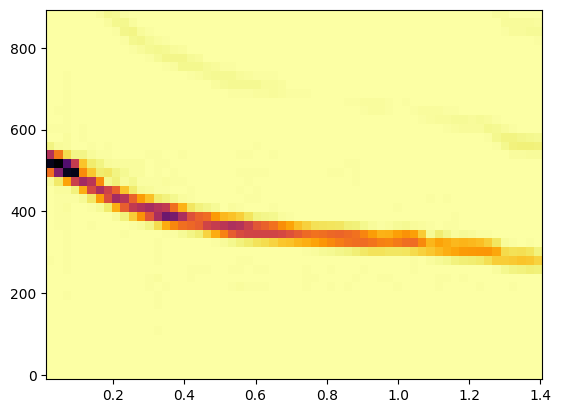

In [56]:
wave.make_spectrogram(2048).plot(high=900)

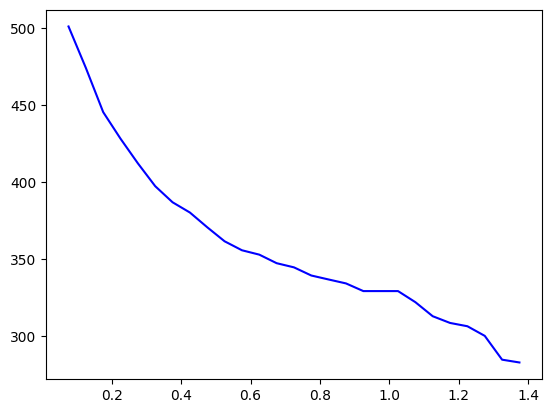

In [57]:
plt.plot(time, freq, color='blue')

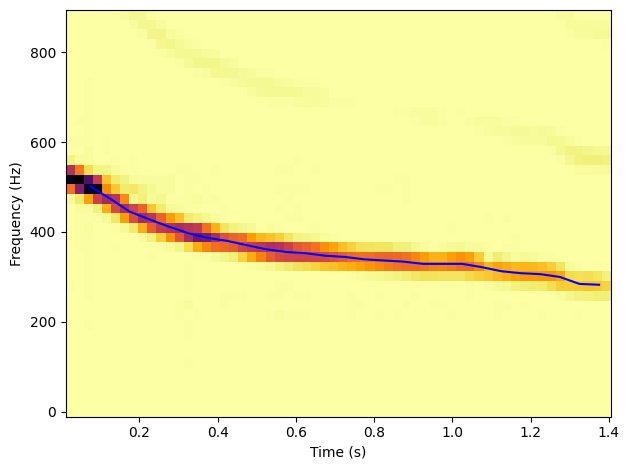

In [58]:
wave.make_spectrogram(2048).plot(high=900)
plt.plot(time, freq, color='blue')
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

estimate_fundamental весьма точно вычисляет фундаментальную высоту ищменяющегося сигнала.

# Упражнение 5.3

Для упражнений в предыдущей главе были нужны исторические цены BitCoins, и надо было оценить спектр мощности изменения цен. Используя те же данные, вычислите автокорреляции цен в платежной системе Bitcoin. Быстро ли спадает автокорреляционная функция? Есть ли признаки периодичности процесса?

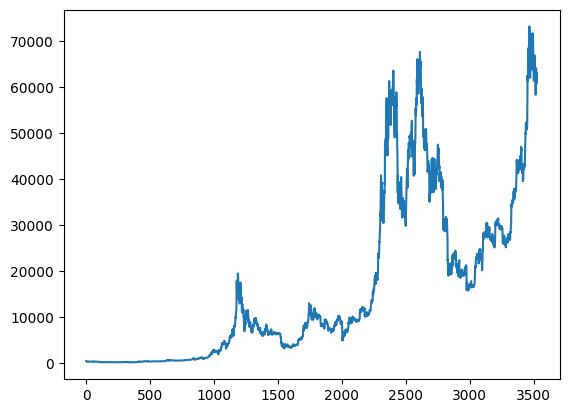

In [59]:
import pandas as pd
from thinkdsp import Wave

if not os.path.exists('BTC-USD.csv'):
    !wget https://github.com/Ch0rtik/telecom/raw/main/chap_04/BTC-USD.csv

df = pd.read_csv('BTC-USD.csv')
ys = df['Close']
ts = df.index

w = Wave(ys, framerate=1)
w.plot()

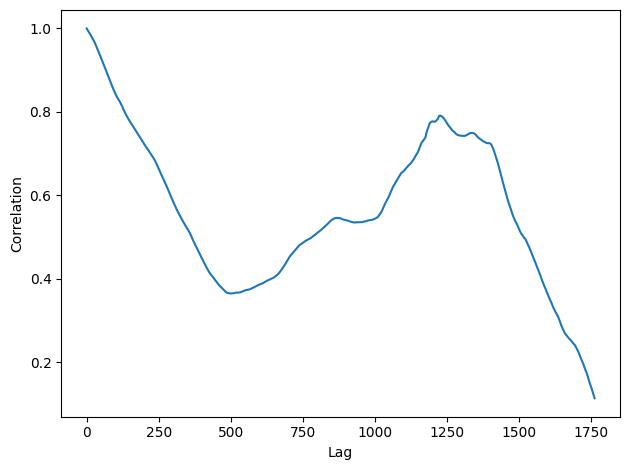

In [60]:
lags, corrs = autocorr(w)
plt.plot(lags, corrs)
decorate(xlabel='Lag',
         ylabel='Correlation')

Автокорреляция быстро спадает, но на средних значениях lag возрастает обратно. О переодичности сигнала говорить трудно.

# Упражнение 5.4

В репозитории этой книги есть блокнот Jupyter под названием saxophone.ipynb, в котором исследуются автокорреляция, восприятие высоты тона и явление, называемое подавленная основная. Прочтите этот блокнот и «погоняйте» примеры. Выберите другой сегмент записи и вновь поработайте с примерами.

У Ви Харт (Vi Hart) есть отличное видео под названием «Так что же там с шумами(Наука и математика звука, частота и высота тона)». Она демонстрирует феномен подавленной основной и объясняет, как воспринимается высота тона (по крайней мере, насколько об этом известно). См. https://www.youtube.com/watch?v=i_0DXxNeaQ0.

In [61]:
if not os.path.exists('100475__iluppai__saxophone-weep.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/100475__iluppai__saxophone-weep.wav

In [62]:
wave = read_wave('100475__iluppai__saxophone-weep.wav')
wave.normalize()
wave.make_audio()

In [63]:
segment = wave.segment(start=3, duration=0.2)
segment.make_audio()

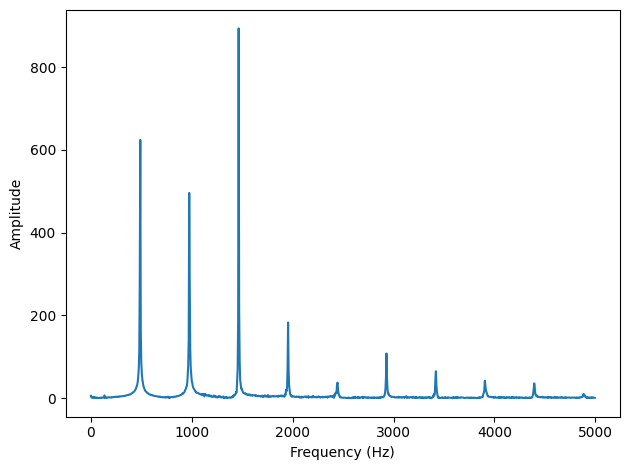

In [64]:
spectrum = segment.make_spectrum()
spectrum.plot(high=5000)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [65]:
spectrum.peaks()[:5]

[(893.1571731035834, 1465.0),
 (623.9483370190854, 490.0),
 (496.01150887217756, 975.0),
 (300.84180735539553, 485.0),
 (283.0406580692698, 980.0)]

Фундаментальная частота – 490 Гц, даже несмотря на то, что в амплитуде доминирует другие гармоники.

In [66]:
from thinkdsp import TriangleSignal

TriangleSignal(freq=490).make_wave(duration=0.2).make_audio()

In [67]:
def autocorr_sax(segment):
    corrs = np.correlate(segment.ys, segment.ys, mode='same')
    N = len(corrs)
    lengths = range(N, N//2, -1)

    half = corrs[N//2:].copy()
    half /= lengths
    half /= half[0]
    return half

In [68]:
def find_frequency(corrs, low, high):
    lag = np.array(corrs[low:high]).argmax() + low
    print(lag)
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

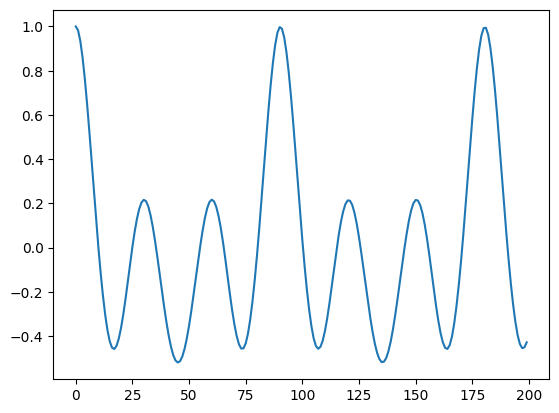

In [69]:
corrs = autocorr_sax(segment)
plt.plot(corrs[:200])

На графике автокорреляции можно увидеть пик между lag 80 и 100. Найдём соответствующую частоту.

In [70]:
print("Fmax = ", find_frequency(corrs, 80, 100))

90
Fmax =  489.99999999999994


Был найден тот же основной тон.

Уберем основной тон:

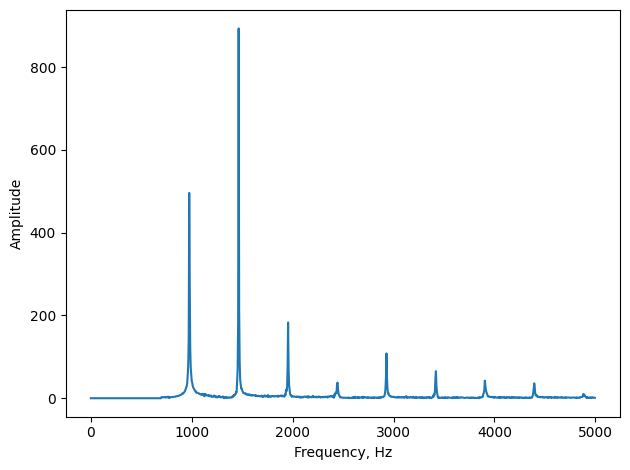

In [71]:
spectrum2 = segment.make_spectrum()
spectrum2.high_pass(700)
spectrum2.plot(high=5000)
decorate(xlabel='Frequency, Hz', ylabel='Amplitude')

In [72]:
segment2 = spectrum2.make_wave()
segment2.make_audio()

На слух высота звука осталась той же.

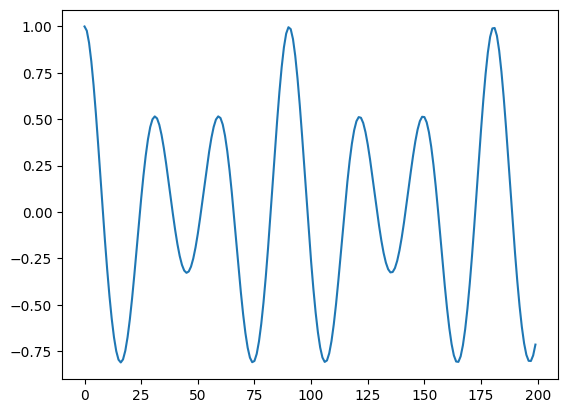

In [73]:
corrs = autocorr_sax(segment2)
plt.plot(corrs[:200])

И в автокорреляции сохранился тот же самый пик.

In [74]:
find_frequency(corrs, 80, 100)

90


489.99999999999994

Вычисленнная фундаментальная частота осталась той же, даже когда соответствующая гармоника остсутствует в сигнале.

Данный приём часто используется для передачи низких звуков с помощью аппаратуры, не включающей низкие частоты в свой диапазон. Гармоники заставляют слышащего "достраивать" отсутствующую фундаментальную частоту.